# Contour Plots

Contour plots using matplotlib are easy and informative. 

We imagine that we are given a function of two variables $f(x,y)$. We think of $z = f(x,y)$ as the elevation above the point $(x,y)$. A level set of $f$ is a curve in the $(x,y)$ plane on which $f$ is constant. Such a curve is also known as a contour -- a curve of points of equal elevation (height). The goal is to visualise the function $f$ by looking at many of its level sets, similar to how one views a hilly or mountainous terrain by looking at a [topographic map](https://en.wikipedia.org/wiki/Topographic_map).

We frequently generate [filled contour plots](https://www.tutorialspoint.com/matplotlib/matplotlib_contour_plot.htm), in which colours indicate levels of the function $f$.

For our purposes, contour plots will be useful for visualising optimisation problems and decision functions in machine learning. In this notebook we will cover the basics of contour plots.

---


In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

---

## Evaluate function on a 2D grid

### Generating a grid

We have previously generated one-dimensional grids using `np.linspace`, for example we have generated time grids using `t = np.linspace(0, tf, Nsteps+1)`.

The first thing we need to learn is how to generate a two-dimensional grid of (x,y) points. The most common procedure is to first generate two 1D arrays, x and y, with grid values for the x and y coordinates separately. From these 1D arrays, the NumPy function `meshgrid(x,y)` generates 2D grid arrays by taking the [Cartesian product](https://en.wikipedia.org/wiki/Cartesian_product) of the two 1D arrays. It is common to use capital letters for the arrays returned by `meshgrid`. We will use `X` and `Y`. (You will find that `X`, `Y`, or `XX`, `YY` are used in many examples on the web.)  

Let us look at an example and then discuss further.

In [2]:
# x grid and y grid defined separately
x = np.linspace(-3.0, 3.0, 7)
y = np.linspace(-2.0, 2.0, 5)

# meshgrid generates a two-dimensional grid
X, Y = np.meshgrid(x, y)

We used a small number of grid points above so that we can print the various arrays

In [3]:
# print the x and y arrays
print(x)
print(y)
print()

# print the 2D arrays X and Y
print(X)
print()
print(Y)
print()

[-3. -2. -1.  0.  1.  2.  3.]
[-2. -1.  0.  1.  2.]

[[-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]]

[[-2. -2. -2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.  2.]]




`X` and `Y` are 2D arrays with the $x$ and $y$ coordinates of the grid points. You will not need to worry too much about the details of these arrays, but it is important that you realise that `X` and `Y` are both 2D arrays. 

### Evaluating a function on a grid

The reason for having separate arrays `X` and `Y` for the $x$ and $y$ coordinates is because this makes it very natural and easy to evaluate a function on a grid. 

Consider the function $f(x,y)$ given by

$$
f(x,y) = 1 - x^2 + y^2 + 0.1 x^4 
$$

We can easily write a Python function corresponding to this mathematical function

In [4]:
# define a function f(x,y)
def my_fun(x, y):
    return 1 - x**2 + y**2 + 0.1*x**4 

Because Python evaluates all operations elementwise, we can call this function with arrays, not just scalar values. In particular, we can call the function with our 2D arrays `X` and `Y` and thereby evaluate the function everywhere on the grid with a single function call. This is shown in the cell below we define a 2D array `Z` to be the values of the function evaluate on the grid. 

In [5]:
# Set Z to be the values of the function on the grid

Z = my_fun(X, Y)

Print the `Z` array.

In [6]:
# print the 2D array Z
print(Z)

[[ 4.1  2.6  4.1  5.   4.1  2.6  4.1]
 [ 1.1 -0.4  1.1  2.   1.1 -0.4  1.1]
 [ 0.1 -1.4  0.1  1.   0.1 -1.4  0.1]
 [ 1.1 -0.4  1.1  2.   1.1 -0.4  1.1]
 [ 4.1  2.6  4.1  5.   4.1  2.6  4.1]]


---

We now have three 2D arrays: the `X` and `Y` arrays with the grid coordinates, and the array `Z` containing the value of the function at each grid point. 

**Exercise:** We constructed our first grid to only have 7 grid points in the $x$ direction and 5 in the $y$ direction so that we could easily print the arrays. In the cell below, use `np.linspace` to create a 1D array `x` from -3 to 3 with 101 values and a 1D array `y` from -2 to 2 with 101 values. From these use `meshgrid` to create arrays 2D `X` and `Y`. From `X` and `Y` create array `Z` by calling `mu_fun`. **You need to do this before going on**, in order to have a sufficiently fine grid to generate decent contour plots. 

In [7]:
# generate X, Y, Z on a 101x101 grid.
x = np.linspace(-3,3,101)
y = np.linspace(-2,2,101)
X, Y = np.meshgrid(x, y)
Z = my_fun(X, Y)

---

## Contour plots

Now we are ready to plot the contours. There are two matplotlib functions
- [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) (plots contour lines).
- [contourf](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html)(plots filled regions).

(See also [here](https://www.tutorialspoint.com/matplotlib/matplotlib_contour_plot.htm)).

Both functions have the arguments, `X, Y, Z`. 

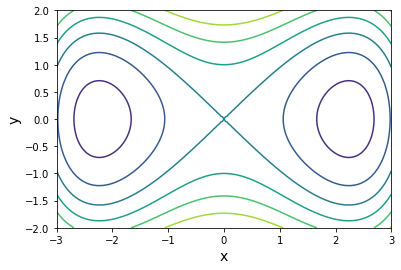

In [8]:
# line contour plot
plt.contour(X, Y, Z)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.show()

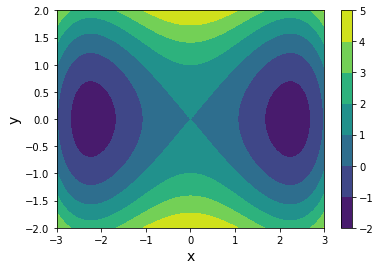

In [9]:
# filled contour plot
plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.show()

In the filled contour plot we have included the [colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html)
using `plt.colorbar()`. This lets viewer understand the relationship between the colours and the values of the function.

From what you learned in Geometry and Motion, you should be able to work out that the function has three critical points. Do the locations of those critical points agree with what you see? From the critical points, what is the minimum value of $f$?

**Exercise:** Change the number of contour levels in the above two plots to 14 by adding `levels = 14` to both `contour` and `contourf` function calls. (If for any reason you have an older version of Matplotlib installed, this will not work. Either upgrade Matplotlib or else skip this.) Then for the filled contour plot try `levels = 50`.

With `levels = 50` you should see more-or-less continuous colours. Moreover, you will see that the colour bar has a minimum value of 1.5, which agrees with $f(\pm(\sqrt{5},0))$. If you use fewer contour levels, the minimum contour level might not be very close to the minimum value of the function. If you use many contours, then there will surely be a contour near the minimum of $f$. 

---

Mostly from here it is a matter of investigating some of the key options (levels, linestyles, colormap) to control the way plots look.

## Options

#### levels and linestyles

In some cases we want to specify exactly the levels of the contours to plot, not the number of contours to plot. This is achieved by passing the argument `levels` as an array of values rather than an integer. 

In some cases we want to specify the line times of the contours, so that some contours are plotted as solid lines while others are plotted as dashed lines. 

The code cell below illustrates both of these features. 

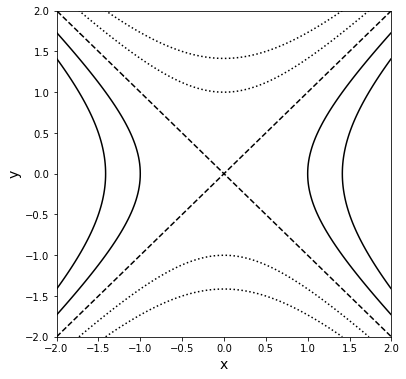

In [10]:
# define a simple saddle function 
def my_saddle(x,y):
    return x**2 - y**2

# create grid and evaluate function on the grid
x = np.linspace(-2, 2, 101)
y = np.linspace(-2, 2, 101)
X, Y = np.meshgrid(x, y)
Z = my_saddle(X, Y)

# plot contours with specific levels and line types
# colors = 'k' sets the contours to black
# levels = array sets the specific contour levels to plot
# linestyles = array of line styles for each of the contours
fig = plt.figure(figsize=(6,6))
plt.contour(X, Y, Z, colors='k', levels=[-2, -1, 0, +1, +2], linestyles=[':', ':', '--', '-', '-'])   
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.show()

You should see that the contours corresponding to negative levels are dotted, the zero contour is dashed, and the positive contours are solid.

---

#### colormaps

Using `cmap = 'colormap name'` one can specify the colours of the lines or filled regions in the contour plots. 
The list of colormap names can be found [here](https://matplotlib.org/stable/gallery/color/colormap_reference.html). 

Below are two examples using different colours for the first function we considered.


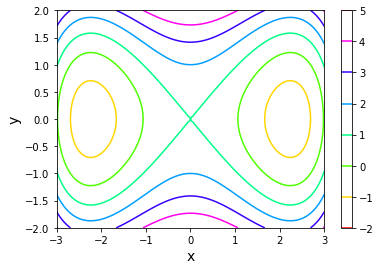

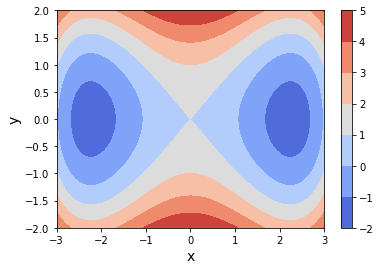

In [11]:
# x grid and y grid defined separately
x = np.linspace(-3.0, 3.0, 101)
y = np.linspace(-2.0, 2.0, 101)

# meshgrid generates a two-dimensional grid
X, Y = np.meshgrid(x, y)

# evaluate the function on the grid
Z = my_fun(X, Y)

# line contour plot 
plt.contour(X, Y, Z, cmap='hsv')
plt.colorbar()
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.show()

# filled contour plot
plt.contourf(X, Y, Z, cmap='coolwarm')
plt.colorbar()
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.show()

---
## Exercises

Refer to the options listed [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html) as needed and feel free to explore on your own.  

- Change the colormap in the filled contour plot above. Try: `magma`, `plasma`, `Reds`, and `jet`. (`jet` used to be one of the most used colormaps, but it is now out of favour.) The matplotlib [colormap reference](https://matplotlib.org/stable/gallery/color/colormap_reference.html) provides a long list of colormaps. Explore other colormaps if you wish. When you are finished trying different colormaps, set the colormap to `coolwarm`.
- Add the argument `alpha = 0.5` in the contour plots. Try a few other values of `alpha` between 0 and 1. When finished remove the argument `alpha`. 
- Edit `my_fun` defined near the top of this notebook to change the function being plotted to this
$$
f(x,y) = 1 - 0.8x - x^2 + y^2 + 0.1 x^4 
$$
and rerun the cell defining the function. Then rerun the cell just above generating contour plots. Notice how the contours have changed.

- It is common to want to plot both filled contours and contour lines on the same plot. You can do this by calling both `contourf` and `contour`. You must call them in this order or else the filled contours will be on top of the contour lines and you will not be able to see the contour lines. In fact the call to `contour` must be after the call to `plt.colorbar`. Try this. You will want the same levels for both contour plots, so either do not use the `levels = ` option or else use `levels = ` with the same value for both. You will want `colors='k'` for the contour lines so that they are black. By default, when you plot contour lines in a single colour, the contours corresponding to negative values are plotted as dashed lines.  

    If you get stuck see the answer below.

---

Answer to final exercise

In [ ]:
# Assumes X, Y, Z have been set correctly

# filled contour plot
plt.contourf(X, Y, Z, cmap='coolwarm')
plt.colorbar()
plt.contour(X, Y, Z, colors = 'k')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.show()